# Define the libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import timedelta

# Define Function

In [2]:
def PlotData(Begin,Duration,Mistake,OncourtFrame,OncourtVideo,Time,Data1,Data2,Figuur,player,pdf):
    Start = int((((OncourtFrame - OncourtVideo)*100) + Begin/10) - Mistake*100)
    Stop = int(Start + Duration*100)
    fig, ax = plt.subplots()
    ax.plot(Time[Start:Stop],Data1[Start:Stop],'r',Time[Start:Stop],Data2[Start:Stop],'b')
    ax.legend(['Wheel Rotation Speed','Frame Rotation Speed'])
    ax.set_xlabel('Time (sec)')
    ax.set_title("Fast Defence " + str(Figuur) + ", " + str(player) + ", Video Time = " + str(timedelta(seconds=(int(Begin/1000)-Mistake))))
    pdf.savefig()

# Visualize Data
## Define player and match

In [3]:
Player = 15
Game = 2

## Insert Data player

In [4]:
df_Player = pd.read_csv('matrix_Player_' + str(Player) + '_game_' + str(Game) + '.csv')
df_Player.columns = ['frAcc','frRoAcc','frDispl','frRoAng','frSpeed','timeLine','frameRotationalSpeedX','frameRotationalSpeedY','frameRotationalSpeedZ','wheelRotationalSpeedX','wheelRotationalSpeedY','wheelRotationalSpeedZ','frRoSpeed']
df_Action = pd.read_csv('Ned_DUI_Game_' + str(Game) + '.csv')
df_Player

,frAcc,frRoAcc,frDispl,frRoAng,frSpeed,timeLine,frameRotationalSpeedX,frameRotationalSpeedY,frameRotationalSpeedZ,wheelRotationalSpeedX,wheelRotationalSpeedY,wheelRotationalSpeedZ,frRoSpeed
0,0.000000,0.0,0.0,0.00000,0.000000,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
1,0.000000,0.0,0.0,0.00000,0.000000,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
2,0.000000,0.0,0.0,0.00000,0.000000,0.03,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
3,0.000000,0.0,0.0,0.00000,0.000000,0.04,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
4,0.000000,0.0,0.0,0.00000,0.000000,0.05,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
860405,-0.002098,6556.8,-1946.6,-0.18538,-0.000787,8604.10,1.0500,0.85556,-1.0500,1.4000,1.16670,-1.5867,-0.40135
860406,-0.026347,6556.8,-1946.6,-0.18939,-0.000808,8604.10,1.0920,0.93100,-1.0710,1.4000,1.09200,-1.6240,-5.03910
860407,0.012933,6556.8,-1946.6,-0.23979,-0.001071,8604.10,1.1690,0.95900,-1.1200,1.4000,1.08110,-1.5089,NaN
860408,NaN,NaN,NaN,NaN,NaN,NaN,1.1433,0.93333,-1.0967,1.4000,1.08500,-1.4700,NaN


## Define boundaries
### Get Timestamps from CSV

In [5]:
df_Action_Player = df_Action.loc[df_Action["Players Group Box"] == ("Player " + str(Player))]
df_Action_Player_Fast_defence = df_Action_Player.loc[df_Action_Player["Player"] == "Fast defence"]#.iloc[::-1]
Timestamp = df_Action_Player_Fast_defence.Position.to_numpy()
print(len(Timestamp))
Timestamp

10


array([ 106520,  437880,  504120,  575680,  636800, 1908120, 2495800,
       2869600, 3705560, 3933240])

### Synchronize
Times consist of the oncourt times in the video and the oncourt frames in Matlab

In [6]:
Times = [
         [((25.72)),2110.7],
         [((33*60)+1.28),3629.6],
         [((39*60)+39.60),5350.6],
         [((62*60)+16.44),6491.7]
        ]
Times[0][0]

25.72

In [7]:
Error = [-2204,10,2,6,-5,-2,-15,7,10,14,10,10,10,10,16,14,12]
print(len(Error))

17


### Visualize

In [8]:
pdf = PdfPages('Player_' + str(Player) + '_' + str(Game) + '_fastdefences.pdf')

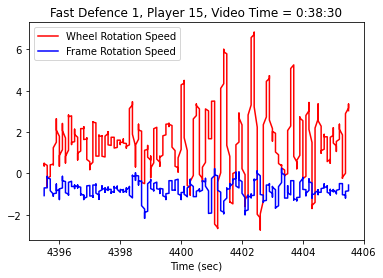

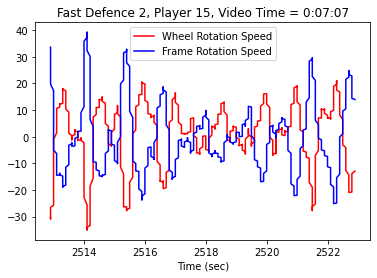

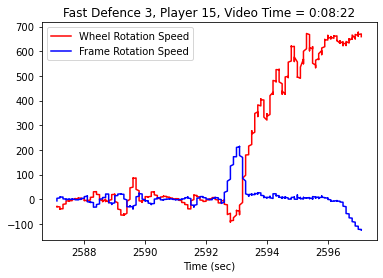

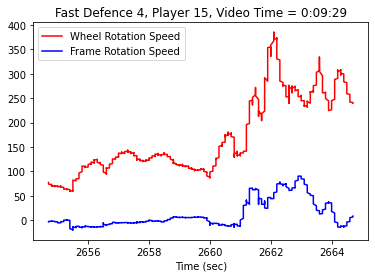

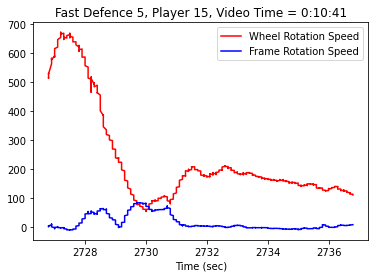

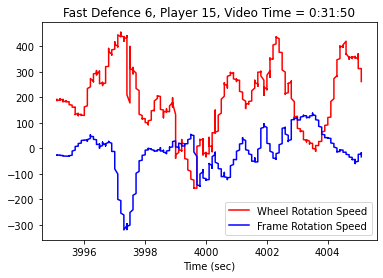

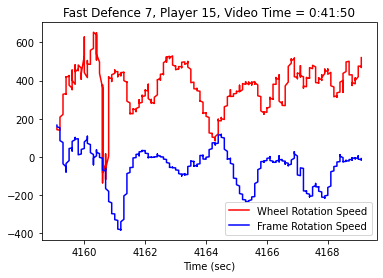

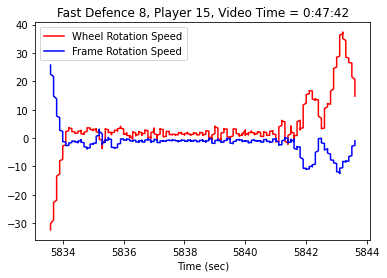

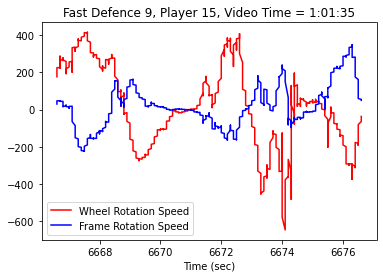

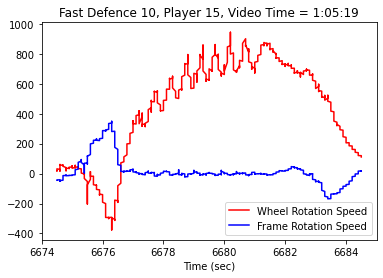

In [9]:
Quator = 0;
for i in range(0,len(Timestamp)):
    if Quator < (len(Times)-1):
        if Timestamp[i] >= (Times[Quator+1][0] * 1000):
            Quator = Quator + 1
    PlotData(Timestamp[i], 10, Error[i], Times[Quator][1], Times[Quator][0], df_Player.timeLine.to_numpy(), 
             df_Player.wheelRotationalSpeedX.to_numpy(), 
             df_Player.frameRotationalSpeedZ.to_numpy(),
             i+1,('Player ' + str(Player)), pdf)

In [13]:
pdf.close()